In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

plt.rcParams['figure.figsize'] = [16, 8]


A = imread(r'C:\Users\Danii\Downloads\DATA_PYTHON\DATA\dog.jpg')
D = np.mean(A, -1); # Convert RGB to grayscale


Dt = np.fft.fft2(D)

In [2]:
Dtsort = np.sort(np.abs(Dt.reshape(-1)))
def g(keep):
    thresh = Dtsort[int(np.floor((1-keep)*len(Dtsort)))]
    ind = np.abs(Dt) > thresh
    Atlow = Dt * ind
    return np.fft.ifft2(Atlow).real

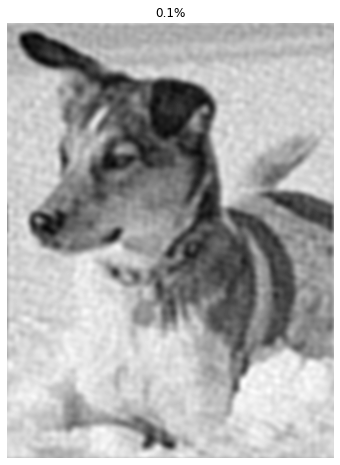

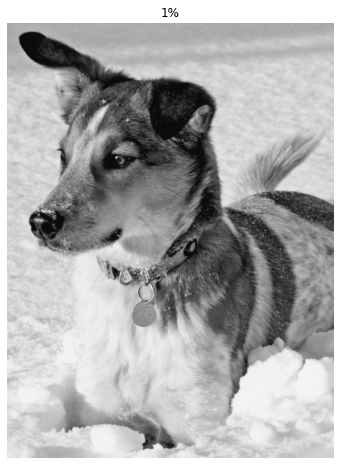

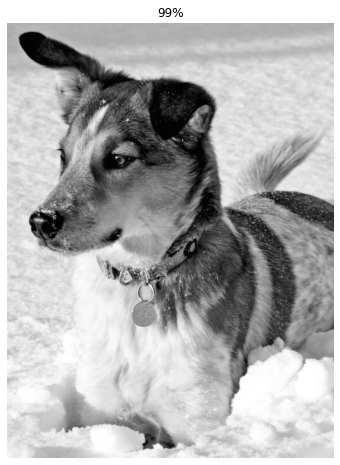

In [3]:
img0 = plt.imshow(g(0.001))
img0.set_cmap('gray')
plt.axis('off')
plt.title("0.1%")
plt.show()

img1 = plt.imshow(g(0.1))
img1.set_cmap('gray')
plt.axis('off')
plt.title("1%")
plt.show() 

img3 = plt.imshow(g(0.99))
img3.set_cmap('gray')
plt.axis('off')
plt.title("99%")
plt.show()

In [ ]:
# Function to return the Frobenius Norm of given matrix

row = np.size(D[0])
col = np.size(D[1])
def frobeniusNorm(mat):
    # To store the sum of squares of the
    # elements of the given matrix
    sumSq = 0
    for i in range(row):
        for j in range(col):
            sumSq += pow(mat[i][j], 2)
 
    # Return the square root of
    # the sum of squares
    res = sqrt(sumSq)
    return round(res, 5)


#E is the function which returns error between compressed and actual image 
#as a function of the compression ratio
def E(r):
    return frobeniusNorm(np.subtract(D,g(r)))/1500

In [ ]:
#graph of E
x = np.arange(0.001,1,0.01)
y=[]

for i in range(np.size(x)):
    y.append(E(x[i]))
    
    
plt.plot(x, y)
plt.xlabel("Compression Ratio")
plt.ylabel("Error")

plt.show()

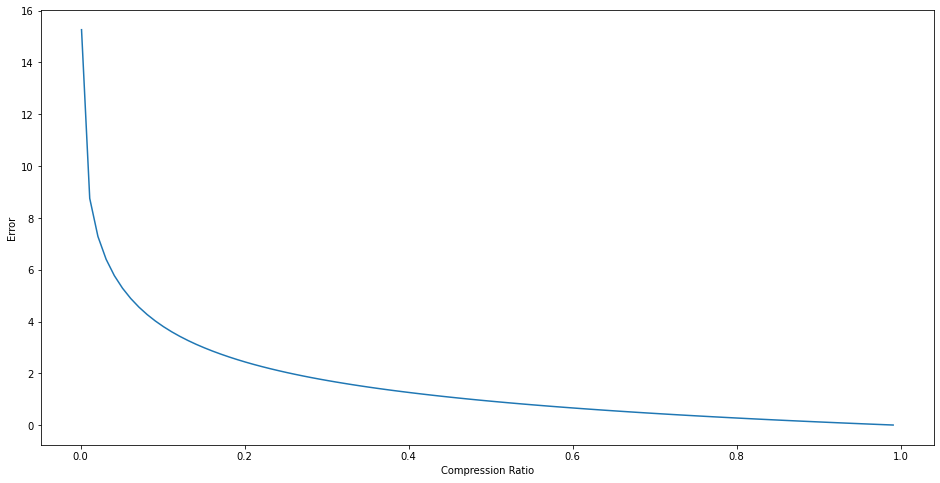